### Importing Packages

In [1]:
import numpy as np
np.set_printoptions(precision=4)      # To display values up to Four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.

import pandas_profiling

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')    # To apply seaborn whitegrid style to the plots.
plt.rc('figure', figsize=(10, 8))     # Set the default figure size of plots.
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")     # To suppress all the warnings in the notebook.

import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

### Data Loading and Description

In [3]:
chef = pd.read_excel('Apprentice_Chef_Dataset.xlsx')

In [314]:
chef.head(3)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,0,80,99.6,3,0,3,12,0


**Description of Dataset**

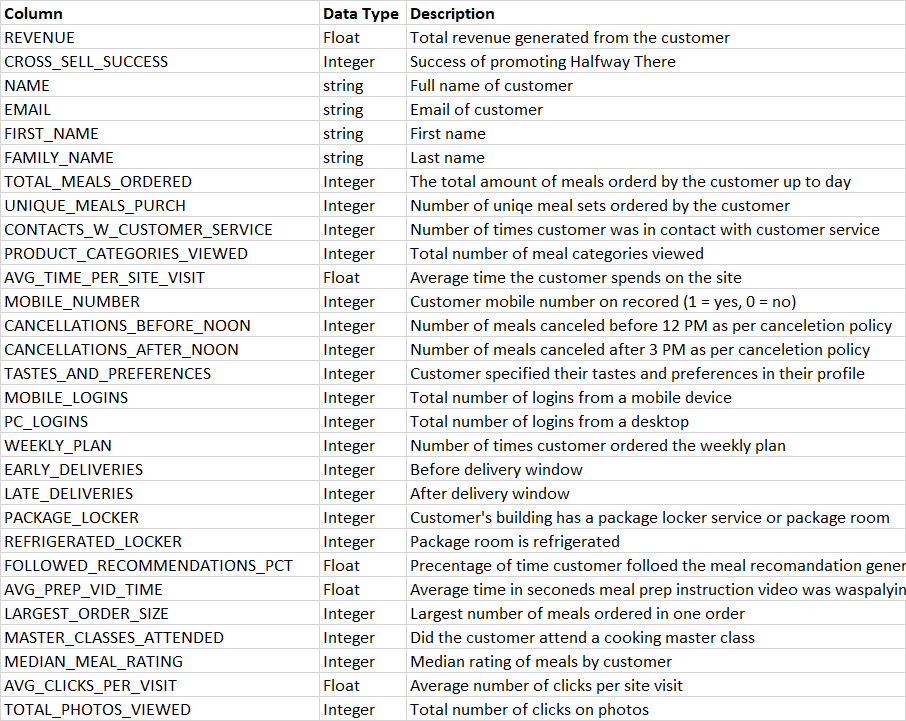

In [315]:
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
PC_LOGINS                       1946 non-null int64
W

- `info` function gives us the following insights into the data:
    - There are total of **1946 samples(rows)** and **29 columns** in the dataset.
    - There are **3 - float** datatype, **22 - numeric** datatype and **4 object** datatype

In [316]:
chef.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,...,2.970709,0.355087,0.113052,35.411100,150.556578,4.436793,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,...,2.744598,0.478663,0.316738,26.577927,49.447180,1.550972,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,33.400000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,10.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,30.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,...,4.000000,1.000000,0.000000,60.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,...,19.000000,1.000000,1.000000,90.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


**Pandas profiling before Data Processing**

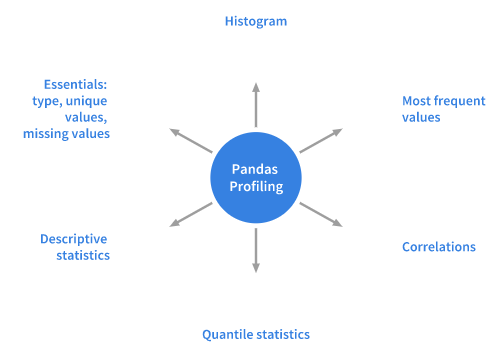


In [4]:
# Pandas_profiling report

chef.profile_report(title='Pandas Profiling before Data Preprocessing')

**Observations from Pandas profiling before data Processing**

**Dataset info:**

    - Number of variables:29
    - Number of observations:1946
    - Missing cells:47 (0.1%)

**Variable Types:**
    - Numeric:16
    - Categorical:6
    - Boolean:5
    - Text (Unique):2




- `CANCELLATIONS_BEFORE_NOON` has 667 (34.3%) zeros
- `EARLY_DELIVERIES` has 1167 (60.0%) zeros
- `FAMILY_NAME` has a high cardinality: 1071 distinct value
- `FAMILY_NAME` has 47 (2.4%) missing values
- `FIRST_NAME` has a high cardinality: 1442 distinct values
- `FOLLOWED_RECOMMENDATIONS_PCT` has 155 (8.0%) zeros
- `LATE_DELIVERIES` has 319 (16.4%) zeros
- `TOTAL_PHOTOS_VIEWED` has 1140 (58.6%) zero
- `WEEKLY_PLAN` has 468 (24.0%) 

### Data Exploration

**Dealing with missing values**

In [318]:
chef.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

In [319]:
# since FAMILY_NAME is the only variable having missing value and is not going to contribute much so we will drop it.
chef = chef.drop(['FAMILY_NAME'], axis=1)
chef = chef.drop(['NAME'], axis=1)
chef = chef.drop(['EMAIL'], axis=1)
chef = chef.drop(['FIRST_NAME'], axis=1)

**Working on BOOLEAN and CATEGORICAL VARIABLES**<br>

**BOOLEAN**
- TASTES_AND_PREFERENCES
- REFRIGERATED_LOCKER
- PACKAGE_LOCKER
- MOBILE_NUMBER
- CROSS_SELL_SUCCESS

**CATEGORICAL**
- CANCELLATIONS_AFTER_NOON
- EMAIL
- FIRST_NAME
- MASTER_CLASSES_ATTENDED
- MOBILE_LOGINs
- PC_LOGINS

**Examining `CROSS_SELL_SUCCESS`**

In [320]:
chef['CROSS_SELL_SUCCESS'].value_counts()

1    1321
0     625
Name: CROSS_SELL_SUCCESS, dtype: int64

In [321]:
round(chef.groupby('CROSS_SELL_SUCCESS')['REVENUE'].mean(), 2)

CROSS_SELL_SUCCESS
0    2099.78
1    2110.85
Name: REVENUE, dtype: float64

**Examining `TASTES_AND_PREFERENCES`**

In [322]:
chef['TASTES_AND_PREFERENCES'].value_counts()

1    1390
0     556
Name: TASTES_AND_PREFERENCES, dtype: int64

In [323]:
round(chef.groupby('TASTES_AND_PREFERENCES')['REVENUE'].mean(), 2)

TASTES_AND_PREFERENCES
0    2093.17
1    2112.94
Name: REVENUE, dtype: float64

**Examining `REFRIGERATED_LOCKER`**

In [324]:
chef['REFRIGERATED_LOCKER'].value_counts()

0    1726
1     220
Name: REFRIGERATED_LOCKER, dtype: int64

In [325]:
round(chef.groupby('REFRIGERATED_LOCKER')['REVENUE'].mean(), 2)

REFRIGERATED_LOCKER
0    2107.41
1    2106.34
Name: REVENUE, dtype: float64

**Examining `PACKAGE_LOCKER`**

In [326]:
chef['PACKAGE_LOCKER'].value_counts()

0    1255
1     691
Name: PACKAGE_LOCKER, dtype: int64

In [327]:
round(chef.groupby('PACKAGE_LOCKER')['REVENUE'].mean(), 2)

PACKAGE_LOCKER
0    2116.28
1    2090.97
Name: REVENUE, dtype: float64

**Examining `MOBILE_NUMBER`**

In [328]:
chef['MOBILE_NUMBER'].value_counts()

1    1708
0     238
Name: MOBILE_NUMBER, dtype: int64

In [329]:
round(chef.groupby('MOBILE_NUMBER')['REVENUE'].mean(), 2)

MOBILE_NUMBER
0    2012.03
1    2120.57
Name: REVENUE, dtype: float64

#### Dealing with Categorical variables

**Examining `CANCELLATIONS_AFTER_NOON`**

In [330]:
chef['CANCELLATIONS_AFTER_NOON'].value_counts()

0    1667
1     238
2      38
3       3
Name: CANCELLATIONS_AFTER_NOON, dtype: int64

In [331]:
round(chef.groupby('CANCELLATIONS_AFTER_NOON')['REVENUE'].mean(), 2)

CANCELLATIONS_AFTER_NOON
0    2126.07
1    2003.48
2    1845.10
3    3228.33
Name: REVENUE, dtype: float64

In [332]:
chef_dummies = pd.get_dummies(chef['CANCELLATIONS_AFTER_NOON'], prefix='CAN', drop_first=True)

In [333]:
# Concatenating the dummy variables into the dataset.

chef = pd.concat([chef,chef_dummies], 1)

# Dropping the CANCELLATIONS_AFTER_NOON column.

chef.drop(['CANCELLATIONS_AFTER_NOON'], 1, inplace=True)

**Examining `MASTER_CLASSES_ATTENDED`**

In [334]:
chef['MASTER_CLASSES_ATTENDED'].value_counts()

0    932
1    858
2    150
3      6
Name: MASTER_CLASSES_ATTENDED, dtype: int64

In [335]:
round(chef.groupby('MASTER_CLASSES_ATTENDED')['REVENUE'].mean(), 2)

MASTER_CLASSES_ATTENDED
0    1569.55
1    2536.14
2    2970.83
3    2722.33
Name: REVENUE, dtype: float64

In [336]:
chef_dummies1 = pd.get_dummies(chef['MASTER_CLASSES_ATTENDED'], prefix='MCA', drop_first=True)

In [337]:
chef = pd.concat([chef,chef_dummies1], 1)

# Dropping the MASTER_CLASSES_ATTENDED column.

chef.drop(['MASTER_CLASSES_ATTENDED'], 1, inplace=True)

**Examining `MOBILE_LOGINs`**

In [338]:
chef['MOBILE_LOGINS'].value_counts()

6    957
5    904
7     44
4     41
Name: MOBILE_LOGINS, dtype: int64

In [339]:
round(chef.groupby('MOBILE_LOGINS')['REVENUE'].mean(), 2)

MOBILE_LOGINS
4    2203.12
5    2081.96
6    2121.18
7    2236.40
Name: REVENUE, dtype: float64

In [340]:
chef_dummies2 = pd.get_dummies(chef['MOBILE_LOGINS'], prefix='ML', drop_first=True)

In [341]:
chef = pd.concat([chef,chef_dummies2], 1)

# Dropping the MOBILE_LOGINS column.

chef.drop(['MOBILE_LOGINS'], 1, inplace=True)

**Examining `PC_LOGINS`**

In [342]:
chef['PC_LOGINS'].value_counts()

1    999
2    919
0     16
3     12
Name: PC_LOGINS, dtype: int64

In [343]:
round(chef.groupby('PC_LOGINS')['REVENUE'].mean(), 2)

PC_LOGINS
0    2018.94
1    2130.09
2    2086.71
3    1903.27
Name: REVENUE, dtype: float64

In [344]:
chef_dummies3 = pd.get_dummies(chef['PC_LOGINS'], prefix='PL', drop_first=True)

In [345]:
chef = pd.concat([chef,chef_dummies3], 1)

# Dropping the PC_LOGINS column.

chef.drop(['PC_LOGINS'], 1, inplace=True)

In [346]:
chef.head(3)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,TASTES_AND_PREFERENCES,...,CAN_3,MCA_1,MCA_2,MCA_3,ML_5,ML_6,ML_7,PL_1,PL_2,PL_3
0,1880.0,1,118,4,7,5,86.0,1,2,0,...,0,1,0,0,0,1,0,0,1,0
1,1495.0,1,44,3,6,3,125.6,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,2572.5,1,38,1,5,3,58.0,1,5,1,...,0,0,0,0,0,1,0,0,1,0


In [347]:
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
WEEKLY_PLAN                     1946 non-null int64
EARLY_DELIVERIES                1946 non-null int64
LATE_DELIVERIES                 1946 non-null int64
PACKAGE_LOCKER                  1946 non-null int64
REFRIGERATED_LOCKER             1946 non-null int64
FOLLOWED_RECOMMENDATIONS_PCT    1946 non-null int64
AVG_PREP_VID_TIME               1946 non-null float64
LAR

### Exploratory Data Analysis

**Removing Outliers**

Text(0.5, 1.0, 'Outlier Detection for REVENUE')

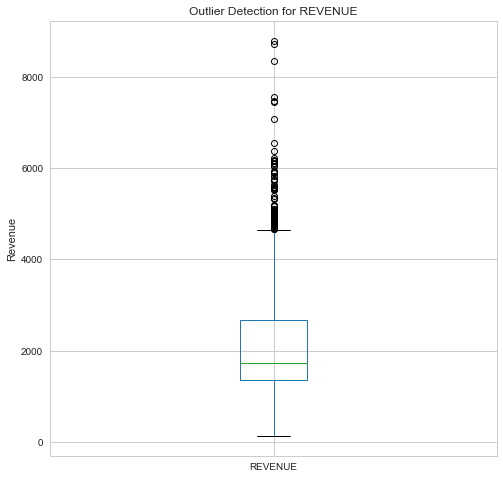

In [348]:
chef['REVENUE'].plot(kind='box', figsize=(8,8))
plt.ylabel('Revenue')
plt.title('Outlier Detection for REVENUE')

- The **boxplot** of **REVENUE** shows the presence of **outliers** in the data.
- The values above **6500** will be dropped.

In [349]:
# Dropping values having REVENUE more than 6500.

chef.drop(chef[chef['REVENUE'] > 6500].index, inplace=True)

Text(0.5, 1.0, 'Outlier Detection for REVENUE')

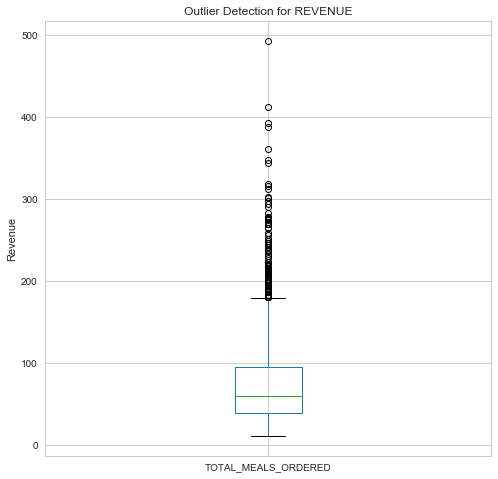

In [350]:

chef['TOTAL_MEALS_ORDERED'].plot(kind='box', figsize=(8,8))
plt.ylabel('Revenue')
plt.title('Outlier Detection for REVENUE')

Text(0.5, 1.0, 'Outlier Detection for REVENUE')

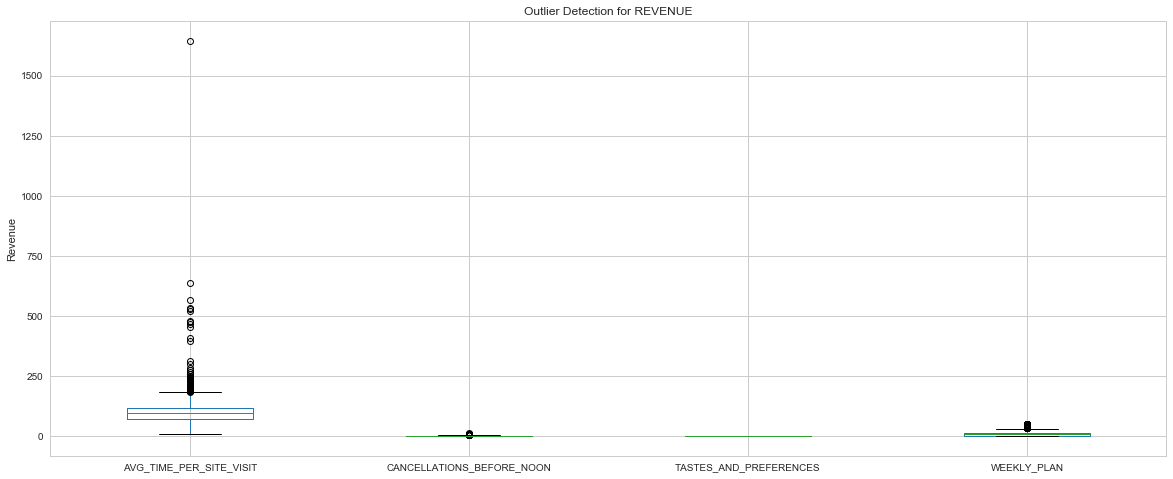

In [351]:
chef[['AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_BEFORE_NOON',
       'TASTES_AND_PREFERENCES', 'WEEKLY_PLAN']].plot(kind='box', figsize=(20,8))
plt.ylabel('Revenue')
plt.title('Outlier Detection for REVENUE')

Text(0.5, 1.0, 'Outlier Detection for REVENUE')

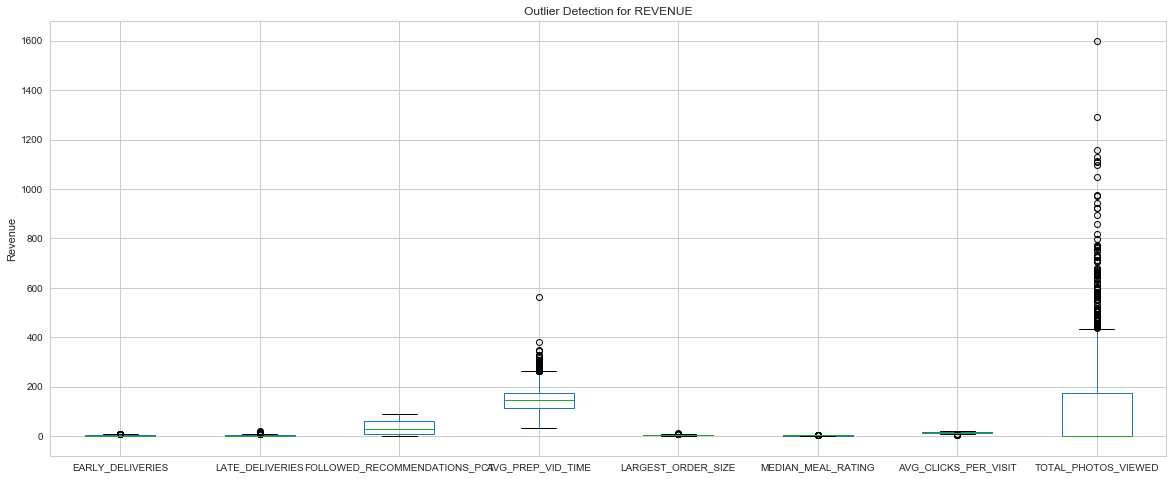

In [352]:
chef[['EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']].plot(kind='box', figsize=(20,8))
plt.ylabel('Revenue')
plt.title('Outlier Detection for REVENUE')

- From boxplot it is obvious that the data do have outliers and we will cap them with threshold for each columns
    - `TOTAL_PHOTOS_VIEWED`: The values above 1150 will be dropped.
    - `PREP_VID_TIME`: The values above 400 will be dropped.
    - `AVG_TIME_PER_SITE_VISIT`: The values above 500 will be dropped.
    - `TOTAL_MEALS_ORDERED`: The value above 400 will be dropped.

In [353]:
chef.drop(chef[chef['TOTAL_PHOTOS_VIEWED'] > 1150].index, inplace=True)
chef.drop(chef[chef['AVG_PREP_VID_TIME'] > 400].index, inplace=True)
chef.drop(chef[chef['AVG_TIME_PER_SITE_VISIT'] > 500].index, inplace=True)
chef.drop(chef[chef['TOTAL_MEALS_ORDERED'] > 400].index, inplace=True)

REVENUE                       AxesSubplot(0.125,0.125;0.133621x0.755)
TOTAL_PHOTOS_VIEWED        AxesSubplot(0.285345,0.125;0.133621x0.755)
AVG_PREP_VID_TIME           AxesSubplot(0.44569,0.125;0.133621x0.755)
AVG_TIME_PER_SITE_VISIT    AxesSubplot(0.606034,0.125;0.133621x0.755)
TOTAL_MEALS_ORDERED        AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

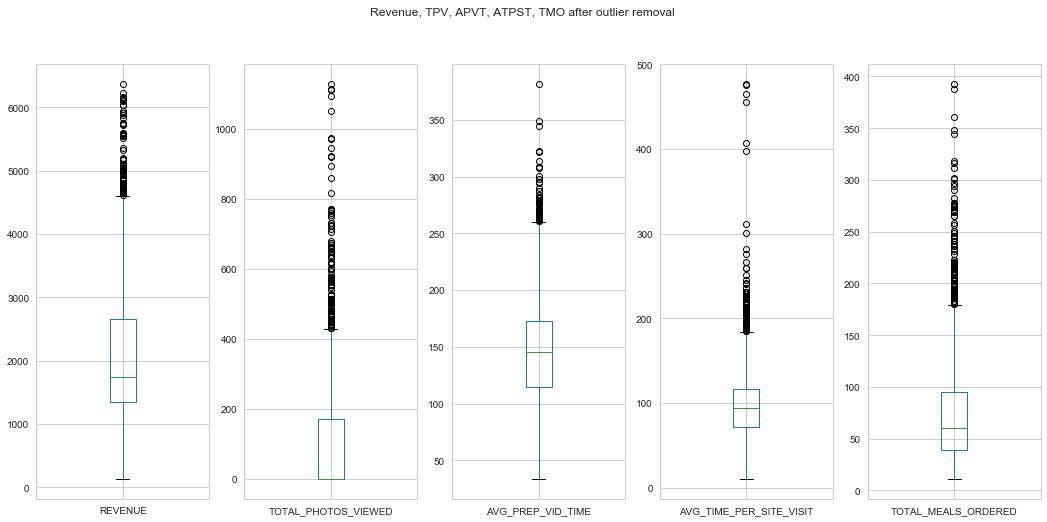

In [354]:
# Plotting a boxplot showing the above columns after outlier removal.

chef[['REVENUE', 'TOTAL_PHOTOS_VIEWED', 'AVG_PREP_VID_TIME', 'AVG_TIME_PER_SITE_VISIT', 'TOTAL_MEALS_ORDERED']].plot(kind='box', figsize=(18,8), subplots=True, 
                                                                             sharex=True, 
                                                                             title='Revenue, TPV, APVT, ATPST, TMO after outlier removal')


Text(0.5, 1.0, 'Distribution of Revenue')

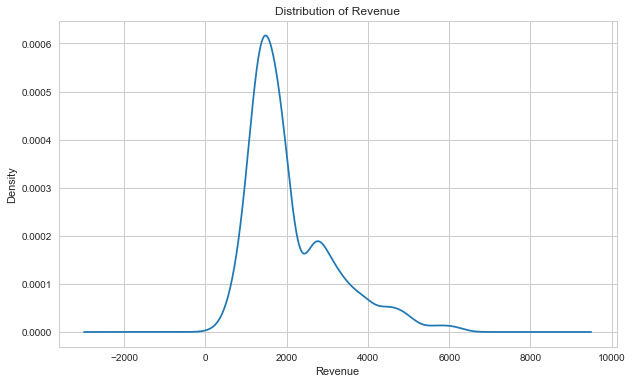

In [355]:
# plotting revenue

chef['REVENUE'].plot(kind='kde', figsize=(10,6))
plt.xlabel('Revenue')
plt.title('Distribution of Revenue')

Text(0.5, 1.0, 'Revenue vs Avg time per site visit')

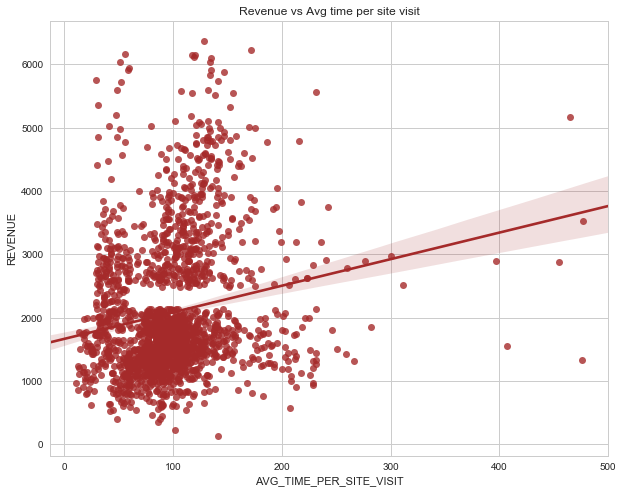

In [356]:
# Plotting Revenue vs Avg time per site visit

plt.figure(figsize=(10,8))
sns.regplot(data=chef, x='AVG_TIME_PER_SITE_VISIT', y='REVENUE', color='brown')
plt.title('Revenue vs Avg time per site visit')

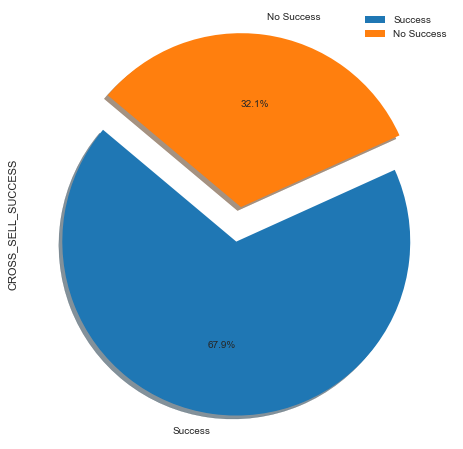

In [357]:
# Plotting CROSS_SELL_SUCCESS's pie chart

chef['CROSS_SELL_SUCCESS'].value_counts().plot(kind='pie', labels=['Success','No Success'], explode = (0.1, 0.1), 
                                      autopct='%3.1f%%', shadow=True, startangle=140, legend=True, figsize=(8,8))

Text(0.5, 1.0, 'REVENUE and CROSS_SELL_SUCCESS')

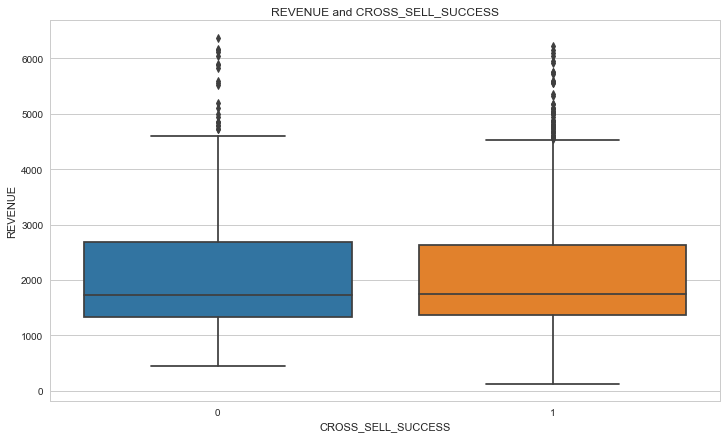

In [358]:
# Plotting a group boxplot between REVENUE and CROSS_SELL_SUCCESS

plt.figure(figsize=(12,7))
sns.boxplot(data=chef, x='CROSS_SELL_SUCCESS', y='REVENUE')
plt.title('REVENUE and CROSS_SELL_SUCCESS')

Text(0.5, 1.0, 'Revenue vs avg prep vid time')

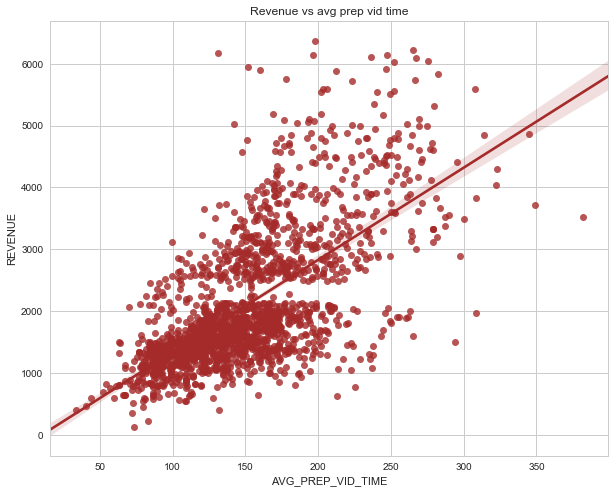

In [359]:
plt.figure(figsize=(10,8))
sns.regplot(data=chef, x='AVG_PREP_VID_TIME', y='REVENUE', color='brown')
plt.title('Revenue vs avg prep vid time')

Text(0.5, 1.0, 'Revenue vs total meals ordered')

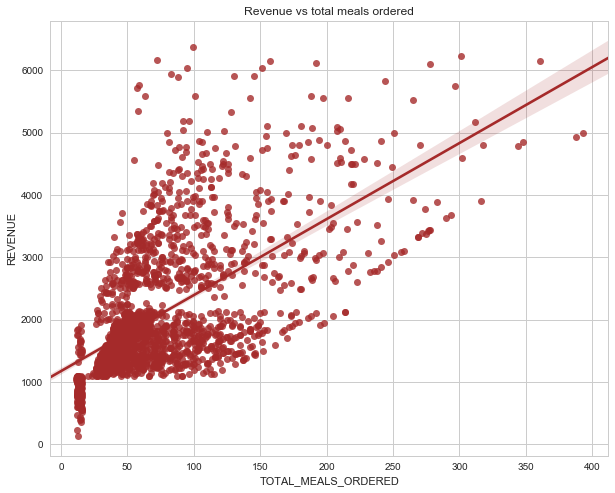

In [360]:
plt.figure(figsize=(10,8))
sns.regplot(data=chef, x='TOTAL_MEALS_ORDERED', y='REVENUE', color='brown')
plt.title('Revenue vs total meals ordered')

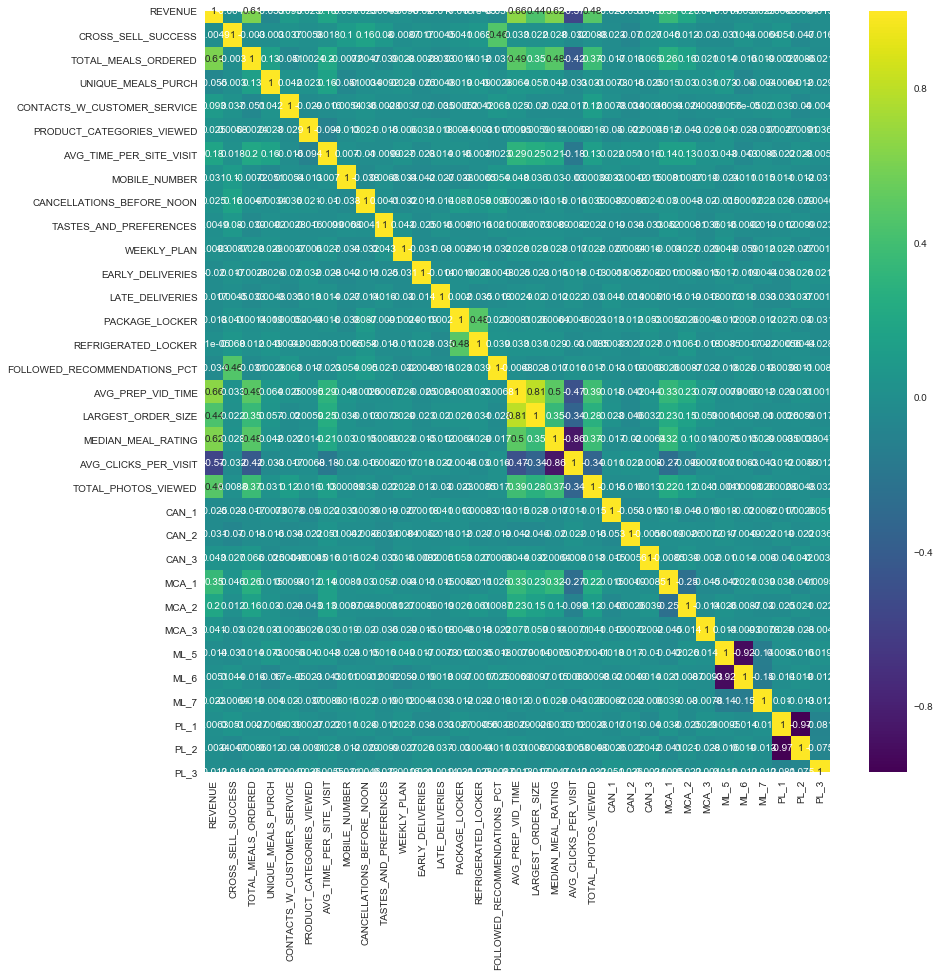

In [361]:
corr_mat = chef.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

### Data train/test split

###

In [362]:
# Splitting the dataset into training and test sets.

chef_train, chef_test = train_test_split(chef, test_size = 0.2, random_state = 2)

In [363]:
# Dropping Revenue from x_train and x_test matrices, and creating y_train and y_test vectors for Revenue values.

x_train = chef_train.drop(['REVENUE'], 1)
y_train = chef_train['REVENUE']
x_test = chef_test.drop(['REVENUE'], 1)
y_test = chef_test['REVENUE']

In [364]:
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED',
       'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
       'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER',
       'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'WEEKLY_PLAN',
       'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER',
       'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'CAN_1', 'CAN_2',
       'CAN_3', 'MCA_1', 'MCA_2', 'MCA_3', 'ML_5', 'ML_6', 'ML_7', 'PL_1',
       'PL_2', 'PL_3'],
      dtype='object')

In [365]:
# Creating a list of the names of x_train columns for future use. 

features = x_train.columns
features

Index(['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'TASTES_AND_PREFERENCES', 'WEEKLY_PLAN', 'EARLY_DELIVERIES',
       'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER',
       'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME',
       'LARGEST_ORDER_SIZE', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT',
       'TOTAL_PHOTOS_VIEWED', 'CAN_1', 'CAN_2', 'CAN_3', 'MCA_1', 'MCA_2',
       'MCA_3', 'ML_5', 'ML_6', 'ML_7', 'PL_1', 'PL_2', 'PL_3'],
      dtype='object')

In [366]:
# Checking the shapes of training and test sets.

print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (1541, 32)
Shape of y_train:  (1541,)
Shape of x_test:  (386, 32)
Shape of y_test:  (386,)


**Linear Regression in Scikit learn**

In [367]:
# Creating our linear regression model and fitting the data into it.

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Using the model for prediction**

In [368]:
# Making predictions on the train set.

y_pred_train = linreg.predict(x_train)
y_pred_train[:10]

array([2269.2989, 1532.7968, 3455.2901, 3839.2721,  847.1333, 2167.1629,
       1323.2182, 1550.9837, 1970.7592, 2269.9869])

In [369]:
# Making predictions on the test set.

y_pred_test = linreg.predict(x_test)
y_pred_test[:10]

array([1460.4902,  728.3036, 1886.263 , 3616.2096, 3865.1264, 1984.6801,
       3301.043 , 1597.4666, 2652.3752, 2918.9288])

In [370]:
residual = y_pred_test - y_test

residual[:10]

999      291.490166
275    -1336.696377
1439    -630.736982
1370    1566.209615
435    -1152.873559
1902     314.680086
376      661.042983
1454    -192.533415
1561    -133.124777
1322     158.928785
Name: REVENUE, dtype: float64

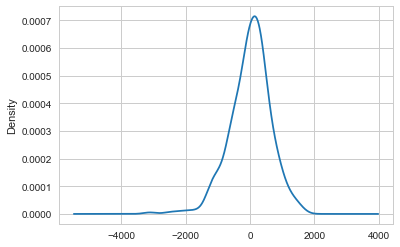

In [371]:
residual.plot(kind='kde')

In [372]:
# To get the intercept of the model.

linreg.intercept_

-46.50762346869624

In [373]:
# To get the coefficients of the model.

coefs = linreg.coef_
features = x_train.columns

list(zip(features,coefs))

[('CROSS_SELL_SUCCESS', -66.33364099804989),
 ('TOTAL_MEALS_ORDERED', 5.555372007395293),
 ('UNIQUE_MEALS_PURCH', -55.945366903612644),
 ('CONTACTS_W_CUSTOMER_SERVICE', 40.41502609867909),
 ('PRODUCT_CATEGORIES_VIEWED', 3.76035043117632),
 ('AVG_TIME_PER_SITE_VISIT', -0.6303817326189912),
 ('MOBILE_NUMBER', 12.415659531054088),
 ('CANCELLATIONS_BEFORE_NOON', 4.946108743665059),
 ('TASTES_AND_PREFERENCES', 22.671988979315515),
 ('WEEKLY_PLAN', -1.064129315516344),
 ('EARLY_DELIVERIES', -0.7964125599922472),
 ('LATE_DELIVERIES', 2.113442303052319),
 ('PACKAGE_LOCKER', -32.06622655349749),
 ('REFRIGERATED_LOCKER', -35.728805014451815),
 ('FOLLOWED_RECOMMENDATIONS_PCT', -0.7270814766933259),
 ('AVG_PREP_VID_TIME', 10.182272934593174),
 ('LARGEST_ORDER_SIZE', -108.37778706582122),
 ('MEDIAN_MEAL_RATING', 288.3388246602982),
 ('AVG_CLICKS_PER_VISIT', -19.7984825638353),
 ('TOTAL_PHOTOS_VIEWED', 0.9161796948947044),
 ('CAN_1', -44.950220253449515),
 ('CAN_2', -114.34814075413708),
 ('CAN_3', 

**Using Grid search to tune our model parameters**

In [374]:
# Setting the parameters to be tuned in GridSearch.

parameters = {'normalize': [True, False]}

In [375]:
gridsearch_linreg = GridSearchCV(estimator=linreg, param_grid=parameters, cv=10)
gridsearch_linreg.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'normalize': [True, False]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [376]:
print('Best params found in GridSearch: ', gridsearch_linreg.best_params_)

Best params found in GridSearch:  {'normalize': False}


In [377]:
print('Best score found in GridSearch: ', gridsearch_linreg.best_score_)

Best score found in GridSearch:  0.6575369674349091


### Model Evaluation

Below are the **types of error** we will be calculating for our _linear regression model_:

- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**

**Mean Absoulte Error(MAE)**

In [378]:
# Calculating the Mean Absolute Error on training and test set.

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [379]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 455.75225750132194
MAE for test set is 479.6067024170505


**Mean Squared Error(MSE)**

In [380]:
# Calculating the Mean Squared Error on training and test set.

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [381]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 375920.79596164764
MSE for test set is 404215.58811041364


**Root Mean Squared Error**

In [382]:
# Calculating the Root Mean Squared Error on training and test set.

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [383]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 613.1238014966045
RMSE for test set is 635.779512182025


**Using R squared**

In [384]:
# Calculating R squared value using the LinearRegression estimator's score() method.

R_squared_train = linreg.score(x_train, y_train)
R_squared_test = linreg.score(x_test, y_test)

print('R squared value for training set is {}'.format(R_squared_train))
print('R squared value for test set is {}'.format(R_squared_test))

R squared value for training set is 0.6768184673617751
R squared value for test set is 0.6242060208191448


In [385]:
# Calculating R squared value using the metrics.r2_score() method.

R_squared_train = metrics.r2_score(y_train, y_pred_train)
R_squared_test = metrics.r2_score(y_test, y_pred_test)

print('R squared value for training set is {}'.format(R_squared_train))
print('R squared value for test set is {}'.format(R_squared_test))

R squared value for training set is 0.676818467361775
R squared value for test set is 0.6242060208191448


**Score**

In [386]:
print('Training Score:', linreg.score(x_train, y_train).round(4))
print('Testing Score:',  linreg.score(x_test, y_test).round(4))

# saving scoring data for future use
lm_train_score = linreg.score(x_train, y_train).round(4)
lm_test_score  = linreg.score(x_test, y_test).round(4)

Training Score: 0.6768
Testing Score: 0.6242


### Using Statsmodel

In [387]:
# building a base model
import statsmodels.formula.api as smf
# blueprinting a model type
lm_best = smf.ols(formula = """REVENUE ~chef['CROSS_SELL_SUCCESS']+
                        chef['TOTAL_MEALS_ORDERED']+
                        chef['UNIQUE_MEALS_PURCH']+
                        chef['CONTACTS_W_CUSTOMER_SERVICE']+ 
                        chef['PRODUCT_CATEGORIES_VIEWED']+
                        chef['AVG_TIME_PER_SITE_VISIT']+ 
                        chef['MOBILE_NUMBER']+ 
                        chef['CAN_1']+
                        chef['CAN_2']+
                        chef['CAN_3']+
                        chef['CANCELLATIONS_BEFORE_NOON']+ 
                        chef['TASTES_AND_PREFERENCES']+ 
                        chef['ML_5']+
                        chef['ML_6']+
                        chef['ML_7']+
                        chef['PL_1']+ 
                        chef['PL_2']+
                        chef['PL_3']+
                        chef['WEEKLY_PLAN']+ 
                        chef['EARLY_DELIVERIES']+ 
                        chef['LATE_DELIVERIES']+
                        chef['PACKAGE_LOCKER']+ 
                        chef['REFRIGERATED_LOCKER']+ 
                        chef['FOLLOWED_RECOMMENDATIONS_PCT']+ 
                        chef['AVG_PREP_VID_TIME']+ 
                        chef['LARGEST_ORDER_SIZE']+ 
                        chef['MCA_1']+
                        chef['MCA_2']+
                        chef['MCA_3']+
                        chef['MEDIAN_MEAL_RATING']+ 
                        chef['AVG_CLICKS_PER_VISIT']+ 
                        chef['TOTAL_PHOTOS_VIEWED']""",
                        data = chef)


# telling Python to run the data through the blueprint
results = lm_best.fit()


# printing the results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     119.1
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:24:37   Log-Likelihood:                -15115.
No. Observations:                1927   AIC:                         3.030e+04
Df Residuals:                    1894   BIC:                         3.048e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [388]:
import sklearn.linear_model

In [389]:
# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit = ridge_model.fit(x_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_model.predict(x_test)

print('Training Score:', ridge_model.score(x_train, y_train).round(4))
print('Testing Score:',  ridge_model.score(x_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(x_train, y_train).round(4)
ridge_test_score  = ridge_model.score(x_test, y_test).round(4)

Training Score: 0.6768
Testing Score: 0.6242


In [390]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(x_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_model.predict(x_test)

print('Training Score:', lasso_model.score(x_train, y_train).round(4))
print('Testing Score:',  lasso_model.score(x_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train, y_train).round(4)
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)

Training Score: 0.6764
Testing Score: 0.624


In [391]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train, y_train)


# PREDICTING on new data
ard_pred = ard_model.predict(x_test)


print('Training Score:', ard_model.score(x_train, y_train).round(4))
print('Testing Score:',  ard_model.score(x_test, y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train, y_train).round(4)
ard_test_score  = ard_model.score(x_test, y_test).round(4)

Training Score: 0.675
Testing Score: 0.6203


In [392]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lm_train_score}           {lm_test_score}
Ridge      {ridge_train_score}           {ridge_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'ARD'],
           
                     'Training' : [lm_train_score, ridge_train_score,
                                   lasso_train_score, ard_train_score],
           
                     'Testing'  : [lm_test_score, ridge_test_score,
                                   lasso_test_score, ard_test_score]}


# converting model_performance into a DataFrame
performance = pd.DataFrame(model_performance)

performance


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.6768           0.6242
Ridge      0.6768           0.6242
Lasso      0.6764           0.624
ARD        0.675           0.6203



,Model,Training,Testing
0,OLS,0.6768,0.6242
1,Ridge,0.6768,0.6242
2,Lasso,0.6764,0.6240
3,ARD,0.6750,0.6203


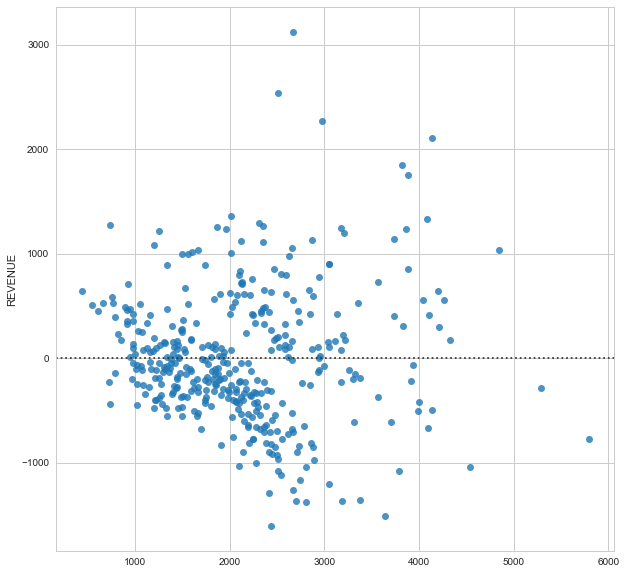

In [393]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 10))


# developing a residual plot
sns.residplot(x = lasso_pred,
              y = y_test)

# displaying the plot
plt.show()

In [394]:
# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

In [395]:
# declaring set of x-variables
x_variables = ['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED',
       'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
       'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER',
       'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'WEEKLY_PLAN',
       'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER',
       'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'CAN_1', 'CAN_2',
       'CAN_3', 'MCA_1', 'MCA_2', 'MCA_3', 'ML_5', 'ML_6', 'ML_7', 'PL_1',
       'PL_2', 'PL_3']


# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
chef_data   = chef.loc[ : ,x_variables]


# Preparing the target variable
chef_target = chef.loc[ : , 'REVENUE']

In [396]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(chef_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(chef_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

# Adding the columns back
X_scaled_df.columns = chef_data.columns

# checking the results
X_scaled_df.describe().round(2)

X_scaled_df

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,TASTES_AND_PREFERENCES,...,CAN_3,MCA_1,MCA_2,MCA_3,ML_5,ML_6,ML_7,PL_1,PL_2,PL_3
0,-0.183070,0.687926,0.819505,-0.365213,0.011593,-0.121160,-0.254608,0.372678,0.380319,-1.582288,...,-0.039487,1.126823,-0.28312,-0.051004,-0.933206,1.018331,-0.152863,-1.024695,1.054959,-0.07916
1,-0.542703,0.687926,-0.556757,-0.768749,-0.426428,-0.779766,0.607922,0.372678,-0.908819,-1.582288,...,-0.039487,1.126823,-0.28312,-0.051004,-0.933206,1.018331,-0.152863,0.975900,-0.947904,-0.07916
2,0.463803,0.687926,-0.668346,-1.575821,-0.864450,-0.779766,-0.864478,0.372678,2.314026,0.631996,...,-0.039487,-0.887451,-0.28312,-0.051004,-0.933206,1.018331,-0.152863,-1.024695,1.054959,-0.07916
3,-0.400718,0.687926,0.038383,-0.768749,0.449614,1.525354,-1.136524,-2.683282,1.024888,0.631996,...,-0.039487,-0.887451,-0.28312,-0.051004,-0.933206,1.018331,-0.152863,0.975900,-0.947904,-0.07916
4,-0.142903,0.687926,-0.166196,-0.768749,-0.426428,1.196051,0.181013,0.372678,-0.264250,-1.582288,...,-0.039487,1.126823,-0.28312,-0.051004,-0.933206,1.018331,-0.152863,-1.024695,1.054959,-0.07916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,-0.524021,-1.453646,-0.668346,1.652465,-0.426428,1.196051,0.453276,0.372678,-0.264250,0.631996,...,-0.039487,-0.887451,-0.28312,-0.051004,-0.933206,1.018331,-0.152863,-1.024695,1.054959,-0.07916
1923,-0.601552,-1.453646,-0.500963,1.248930,-1.302471,0.866748,0.165766,-2.683282,-0.908819,0.631996,...,-0.039487,-0.887451,-0.28312,-0.051004,1.071575,-0.981999,-0.152863,-1.024695,-0.947904,12.63263
1924,-1.357249,-1.453646,-1.114701,0.441858,1.763677,-1.438371,-0.149841,0.372678,-0.264250,0.631996,...,-0.039487,1.126823,-0.28312,-0.051004,-0.933206,1.018331,-0.152863,0.975900,-0.947904,-0.07916
1925,-1.099434,-1.453646,-1.096103,-0.365213,2.201698,0.208143,-0.010225,0.372678,-0.908819,-1.582288,...,-0.039487,-0.887451,-0.28312,-0.051004,-0.933206,1.018331,-0.152863,-1.024695,1.054959,-0.07916


In [397]:
# adding labels to the scaled DataFrame
X_scaled_df.columns = chef_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(chef_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
REVENUE                         1.146046e+06
CROSS_SELL_SUCCESS              2.180394e-01
TOTAL_MEALS_ORDERED             2.891085e+03
UNIQUE_MEALS_PURCH              6.140955e+00
CONTACTS_W_CUSTOMER_SERVICE     5.212066e+00
PRODUCT_CATEGORIES_VIEWED       9.221660e+00
AVG_TIME_PER_SITE_VISIT         2.107859e+03
MOBILE_NUMBER                   1.070791e-01
CANCELLATIONS_BEFORE_NOON       2.406917e+00
TASTES_AND_PREFERENCES          2.039545e-01
WEEKLY_PLAN                     1.834765e+02
EARLY_DELIVERIES                5.340395e+00
LATE_DELIVERIES                 7.534821e+00
PACKAGE_LOCKER                  2.289622e-01
REFRIGERATED_LOCKER             1.007323e-01
FOLLOWED_RECOMMENDATIONS_PCT    7.044397e+02
AVG_PREP_VID_TIME               2.240285e+03
LARGEST_ORDER_SIZE              2.367327e+00
MEDIAN_MEAL_RATING              5.703362e-01
AVG_CLICKS_PER_VISIT            5.424196e+00
TOTAL_PHOTOS_VIEWED             2.916915e+04
CAN_1   

### K-nearest neighbors with non-standardized data

In [398]:
# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 222)

In [399]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# FITTING to the training data
knn_reg.fit(X_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_reg.predict(X_test)


# SCORING the results
print('Training Score:', knn_reg.score(X_train, y_train).round(4))
print('Testing Score:',  knn_reg.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(X_test, y_test).round(4)

Training Score: 1.0
Testing Score: 0.9991


**How many neighbors?**

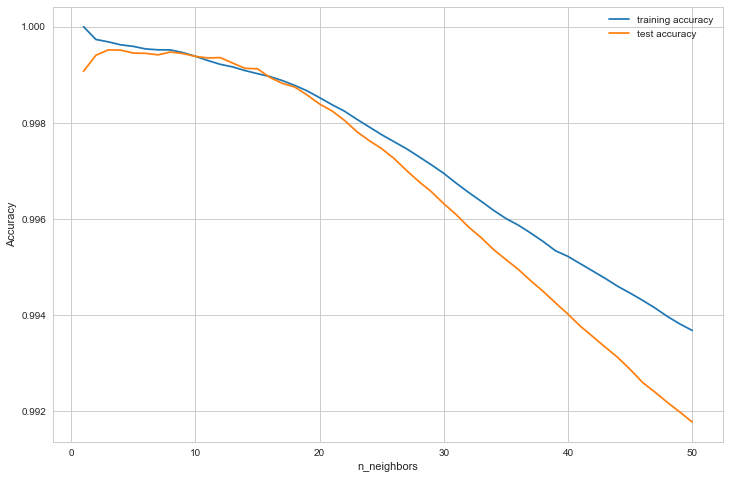

In [400]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [401]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 3


**Creating KNN model using the Optimal number of neigbors**

In [402]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt.predict(X_test)



# SCORING the results
print('Training Score:', knn_opt.score(X_train, y_train).round(4))
print('Testing Score:',  knn_opt.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(X_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(X_test, y_test).round(4)

Training Score: 0.9997
Testing Score: 0.9995


### K-nearest neighbor with standardized data

In [403]:
# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df,
            chef_target,
            test_size = 0.25,
            random_state = 222)

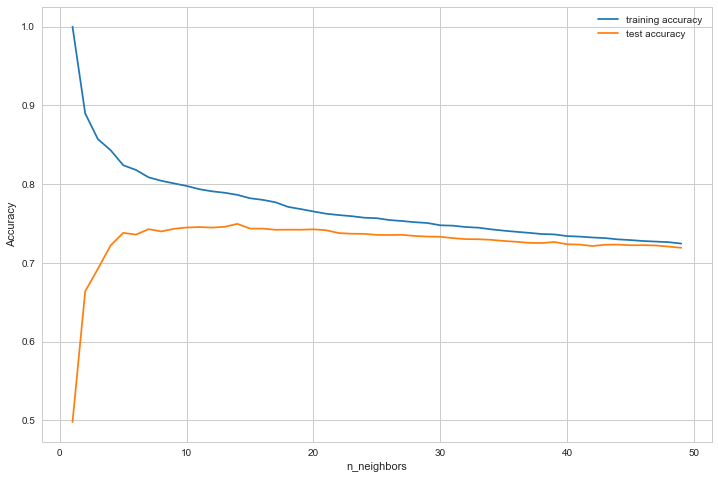

The optimal number of neighbors is 14


In [404]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 50)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [405]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_stand.fit(X_train, y_train)



# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test)



# SCORING the results
print('Training Score:', knn_stand.score(X_train, y_train).round(5))
print('Testing Score:',  knn_stand.score(X_test, y_test).round(5))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train, y_train).round(5)
knn_stand_score_test  = knn_stand.score(X_test, y_test).round(5)

Training Score: 0.78639
Testing Score: 0.74955


In [406]:
# comparing results

print(f"""
KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             {knn_reg_score_train}              {knn_reg_score_test}
Non-Standardized      3            {knn_opt_score_train}           {knn_opt_score_test}
Standardized          11             {knn_stand_score_train}           {knn_stand_score_test}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['KNN_NS_1', 'KNN_NS_3', 'KNN_S_11'],
           
                     'Training' : [knn_reg_score_train, knn_opt_score_train,
                                   knn_stand_score_train],
           
                     'Testing'  : [knn_reg_score_test, knn_opt_score_test,
                                   knn_stand_score_test]}


KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             1.0              0.9991
Non-Standardized      3            0.9997           0.9995
Standardized          11             0.78639           0.74955



In [407]:
# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# concatenating with former performance DataFrame
total_performance = pd.concat([performance, model_performance],
                              axis = 0)


total_performance = total_performance.sort_values(by = 'Testing',
                              ascending = False)


In [408]:
total_performance

,Model,Training,Testing
1,KNN_NS_3,0.99970,0.99950
0,KNN_NS_1,1.00000,0.99910
2,KNN_S_11,0.78639,0.74955
0,OLS,0.67680,0.62420
1,Ridge,0.67680,0.62420
2,Lasso,0.67640,0.62400
3,ARD,0.67500,0.62030
